<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/Binance_TF_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로, 바이낸스 예측

In [1]:
# tensorflow 
import tensorflow as tf
# keras 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.utils import np_utils 

In [3]:
!pip install ccxt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 데이터

In [5]:
import ccxt
import pandas as pd

binance = ccxt.binance()
btc_ohlcv = binance.fetch_ohlcv('BTC/USDT', '1d')  # fetch는 500개만
data = pd.DataFrame(btc_ohlcv, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])


data['datetime'] = pd.to_datetime(data['datetime'], unit='ms')
data.set_index('datetime', inplace=True)
data

,open,high,low,close,volume
datetime,,,,,
2021-03-05,48374.09,49448.93,46300.00,48751.71,78192.496372
2021-03-06,48746.81,49200.00,47070.00,48882.20,44399.234242
2021-03-07,48882.20,51450.03,48882.20,50971.75,55235.028032
2021-03-08,50959.11,52402.78,49274.67,52375.17,66987.359664
2021-03-09,52375.18,54895.00,51789.41,54884.50,71656.737076
...,...,...,...,...,...
2022-07-13,19331.28,20366.61,18910.94,20234.87,209250.248880
2022-07-14,20234.87,20900.00,19616.07,20588.84,174809.216960
2022-07-15,20588.84,21200.00,20382.29,20830.04,143343.304900


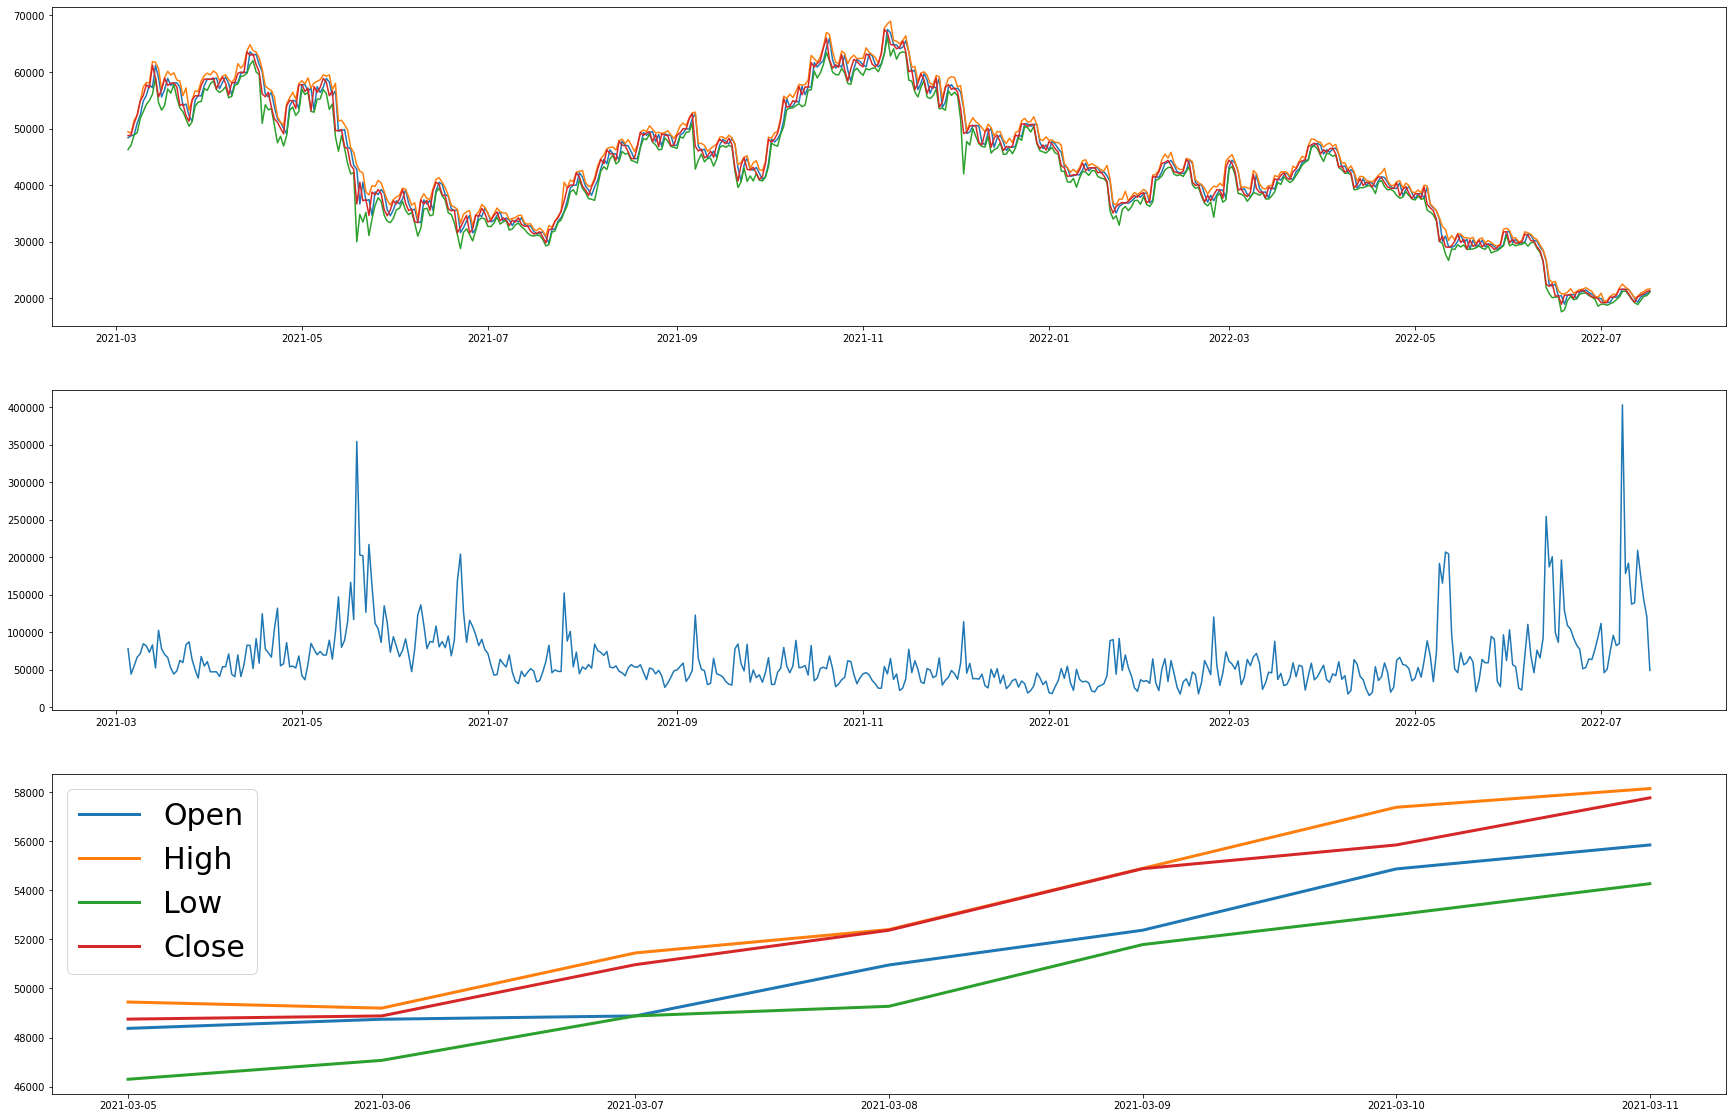

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline

fig=plt.figure(figsize=(30,20))
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)

ax1.plot(data['open'])
ax1.plot(data['high'])
ax1.plot(data['low'])
ax1.plot(data['close'])

ax2.plot(data['volume'])

ax3.plot(data['open'][0:7], linewidth=3.0,label= "Open")
ax3.plot(data['high'][0:7],  linewidth=3.0 ,label= "High")
ax3.plot(data['low'][0:7],   linewidth=3.0,label= "Low")
ax3.plot(data['close'][0:7], linewidth=3.0 ,label= "Close")

ax3.legend(prop={'size': 30})

In [7]:
# Open, High, Low , Volume으로 Close 가격 예측하기 
xdata=data[["open","high","low","volume"]]
ydata=pd.DataFrame(data["close"])

# 데이터 표준화
from sklearn.preprocessing import StandardScaler

xdata_ss=StandardScaler().fit_transform(xdata)
ydata_ss=StandardScaler().fit_transform(ydata)

print(xdata_ss.shape , ydata_ss.shape)

(500, 4) (500, 1)


In [8]:
# 트레이닝 테스트 데이터 분리 
xtrain=xdata_ss[120:,:]
xtest=xdata_ss[:120,:]
ytrain=ydata_ss[120:,:]
ytest=ydata_ss[:120,:]

print( xtrain.shape , ytrain.shape , xtest.shape, ytest.shape)

(380, 4) (380, 1) (120, 4) (120, 1)


## 모델 생성

In [16]:
# 변수선언 
w = tf.Variable(tf.random.normal([4,1])) # 1: 출력되는 y의 갯수 
b = tf.Variable(tf.random.normal([1])) # 1: 출력되는 y의 갯수 

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x = tf.placeholder(tf.float32, shape = [None,4])
y = tf.placeholder(tf.float32, shape = [None,1])

# 가설함수 
hf = tf.matmul(x, w) +b

# 비용함수 
cost = tf.reduce_mean(tf.square(y-hf))

# 트레이닝 함수
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

## 모델 실행

In [18]:
import numpy as np

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        cv, hfv,_ = sess.run([cost, hf, train], feed_dict = {x:xtrain, y:ytrain})
        if step % 200==0:
            print(step, "cost:",cv, "\n prediction:",hfv)        
    hfv, wv, bv = sess.run([hf,w,b],feed_dict = {x:xtest,y:ytest})
    print("Evaluate : {}".format(np.average((hfv - ytest)**2)))

0 cost: 0.5449308 
 prediction: [[-0.1768072 ]
 [-0.12472716]
 [ 0.00626323]
 [-0.09344497]
 [-0.13267162]
 [-0.05289111]
 [-0.18420926]
 [-0.2711589 ]
 [-0.2707354 ]
 [-0.12599936]
 [-0.28919283]
 [-0.24320415]
 [-0.1800991 ]
 [-0.30037656]
 [-0.4252505 ]
 [-0.35917035]
 [-0.30294028]
 [-0.25339666]
 [ 0.02276087]
 [-0.32017174]
 [-0.20075008]
 [-0.20494542]
 [-0.13344619]
 [ 0.88965166]
 [ 0.38686165]
 [ 0.4665326 ]
 [ 0.16452825]
 [ 0.5054634 ]
 [ 0.21280214]
 [ 0.37440005]
 [ 0.16319036]
 [ 0.18500832]
 [ 0.17534307]
 [ 0.5242648 ]
 [ 0.5365801 ]
 [ 0.5119372 ]
 [ 0.52266866]
 [ 0.6927403 ]
 [ 0.51809376]
 [ 0.4565696 ]
 [ 0.5209005 ]
 [ 0.61228645]
 [ 0.5556616 ]
 [ 0.47529012]
 [ 0.590026  ]
 [ 0.5932725 ]
 [ 0.4510702 ]
 [ 0.5744271 ]
 [ 0.6842539 ]
 [ 0.5960091 ]
 [ 0.52173394]
 [ 0.64842844]
 [ 0.6742556 ]
 [ 0.58493495]
 [ 0.6970095 ]
 [ 0.6005606 ]
 [ 0.42863053]
 [ 0.5328469 ]
 [ 0.5558927 ]
 [ 0.51903766]
 [ 0.6355411 ]
 [ 0.6779685 ]
 [ 0.78449285]
 [ 0.5441952 ]
 [ 0.712

## 예측값과 실제값 비교

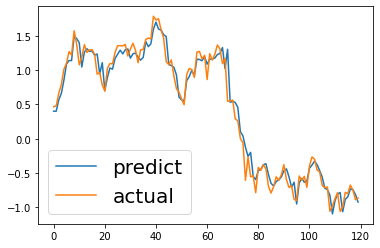

In [19]:
tf_predicted = np.dot(xdata_ss, wv )+ bv

plt.figure()
plt.plot(tf_predicted[:120], label="predict")
plt.plot(ytest,label="actual")

plt.legend(prop={'size': 20})

# 케라스, 바이낸스

In [20]:
xdata=data[["open","high","low","volume"]]
ydata=pd.DataFrame(data["close"])

from sklearn.preprocessing import StandardScaler

xdata_ss=StandardScaler().fit_transform(xdata)
ydata_ss=StandardScaler().fit_transform(ydata)

print(xdata_ss.shape , ydata_ss.shape)

(500, 4) (500, 1)


In [21]:
xtrain=xdata_ss[120:,:]
xtest=xdata_ss[:120,:]
ytrain=ydata_ss[120:,:]
ytest=ydata_ss[:120,:]

print( xtrain.shape , ytrain.shape , xtest.shape, ytest.shape)

(380, 4) (380, 1) (120, 4) (120, 1)


## 모델 구성

In [25]:
# 모델 구성

model = Sequential()

model.add(Dense(units=1024, input_dim=4, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

# 모델 학습과정 설정 
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

## 모델 학습

In [26]:
# 학습 조기종료 
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)

# 모델 트레이닝 
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)
hist = model.fit(xtrain, ytrain, epochs=10, batch_size=16, callbacks=[es])

Train on 380 samples
Epoch 1/10
380/380 [==============================] - 0s 872us/sample - loss: 0.1257 - mean_absolute_error: 0.2337
Epoch 2/10
380/380 [==============================] - 0s 580us/sample - loss: 0.0105 - mean_absolute_error: 0.0786
Epoch 3/10
380/380 [==============================] - 0s 550us/sample - loss: 0.0157 - mean_absolute_error: 0.0914
Epoch 4/10
380/380 [==============================] - 0s 567us/sample - loss: 0.0130 - mean_absolute_error: 0.0870
Epoch 5/10
380/380 [==============================] - 0s 570us/sample - loss: 0.0090 - mean_absolute_error: 0.0746
Epoch 6/10
380/380 [==============================] - 0s 529us/sample - loss: 0.0075 - mean_absolute_error: 0.0677
Epoch 7/10
380/380 [==============================] - 0s 550us/sample - loss: 0.0114 - mean_absolute_error: 0.0788
Epoch 8/10
380/380 [==============================] - 0s 560us/sample - loss: 0.0137 - mean_absolute_error: 0.0869
Epoch 9/10
380/380 [==============================] - 0s 57

## 모델 검증 

In [28]:
# 트레이닝 데이터셋으로 검증해보기 ( 원래는 검증데이터가 따로 있어야됌) 
print("loss:"+ str(hist.history['loss']))
#print("MAE:"+ str(hist.history['mae']))

loss:[0.12565350218823082, 0.010461668371173896, 0.01573302145851286, 0.012953590484041917, 0.008976554037316849, 0.007506937327745713, 0.011407640978301827, 0.013748157043990336, 0.015584062902550948, 0.01665542774196518]


## 모델 사용

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Evaluate : 0.016963267208006404


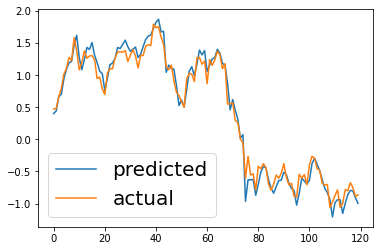

In [29]:
#7 모델 사용
xhat = xtest
yhat = model.predict(xhat)

plt.figure()
plt.plot(yhat, label = "predicted")
plt.plot(ytest,label = "actual")

plt.legend(prop={'size': 20})

print("Evaluate : {}".format(np.average((yhat - ytest)**2)))